In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

In [2]:
generated_directory = '../../data/samples/origami_64_no_embed_reduction/dcd_files/'
reference_directory = '../../data/samples/Tan/'

In [3]:
chrom = '1'
region_idx = 330
cond_scale = 2.5
rescaled_phi = .5
milestone = 120
num_bins = 64

In [4]:
def load_traj(dcd_fp,psf_fp):
    t = md.load(dcd_fp,top=psf_fp)
    t.xyz*= 10
    return t
def load_reference(chrom=chrom,region_idx=region_idx,num_bins=num_bins,directory=reference_directory):
    fp_root = directory + f'/chrom_{chrom}_region_{region_idx}_nbins_{num_bins}'
    return load_traj(fp_root+'.dcd',fp_root+'.psf')
def load_generated(chrom=chrom,region_idx=region_idx,cond_scale=cond_scale,rescaled_phi=rescaled_phi,directory=generated_directory):
    fp_root = directory + f'/sample_{region_idx}_{float(cond_scale)}_{float(rescaled_phi)}_{milestone}_{chrom}'
    return load_traj(fp_root+'.dcd',fp_root+'.psf')

In [5]:
def get_rmsd(t_ref,t_compare):

    assert len(t_ref) == 1, 't_ref must have one frame!'
    t_compare.superpose(t_ref)

    return md.rmsd(t_compare,t_ref,0)

In [6]:
def all_rmsds(t_ref,t_compare):
    rmsds = np.empty((len(t_ref),len(t_compare)))
    for i in range(len(t_ref)):
        rmsds[i,:] = get_rmsd(t_ref[i],t_compare)
    return rmsds

In [7]:
def get_rmsds(t_ref,t_compare):
    return np.stack(
        [
            md.rmsd(t_compare,frame) for frame in t_ref
        ],
        axis=0
    )

In [8]:
def basic_rmsd_hist(rmsds,**kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(rmsds.flatten(),density=True,**kwargs)
    ax.set_xlabel('RMSD')
    ax.set_ylabel('Probability Density')
    return fig, ax

Load Conformations

In [9]:
t_ref = load_reference()
t_gen = load_generated()

Get the RMSD between each conformation and all reference conformations

In [10]:
rmsds = get_rmsds(t_ref,t_gen)

RMSD when each generated conformation is aligned with its best match

In [11]:
def plot_best_rmsds(t_ref,t_compare,**kwargs):
    rmsds = all_rmsds(t_ref,t_compare).min(0)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(rmsds,density=True,**kwargs)
    ax.set_xlabel('RMSD')
    ax.set_ylabel('Probability Density')
    return fig, ax

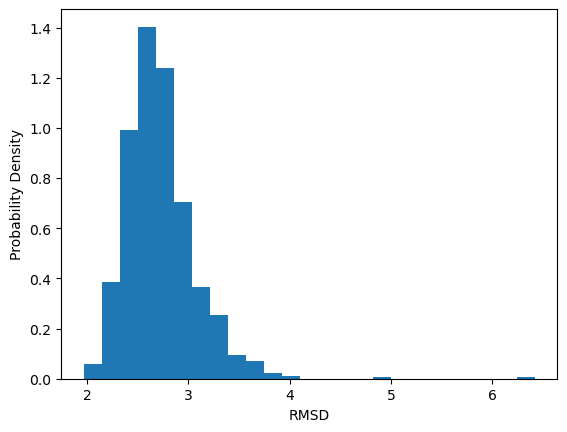

In [12]:
fig,ax = basic_rmsd_hist(rmsds.min(0),bins=25)

A couple of representative plots for individual reference conformations

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='RMSD', ylabel='Probability Density'>)

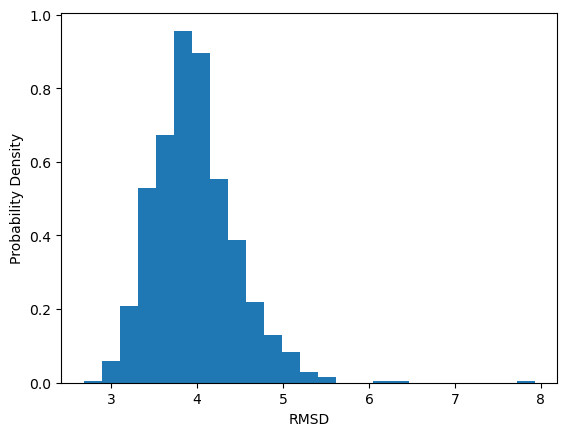

In [13]:
basic_rmsd_hist(rmsds[0,:],bins=25)

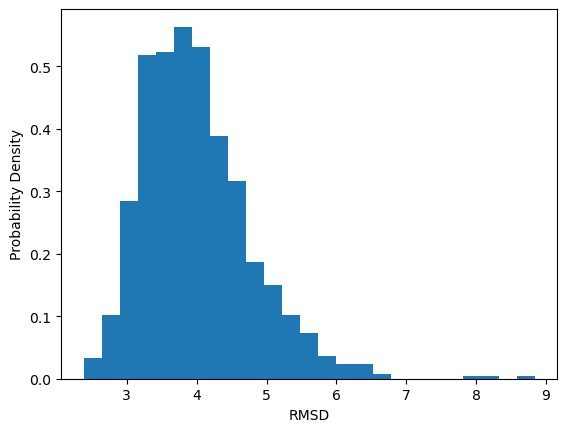

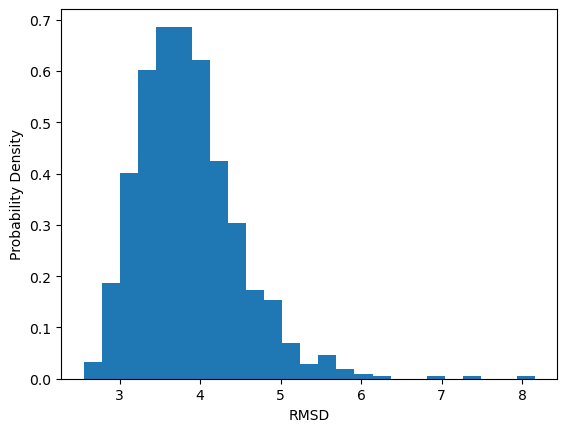

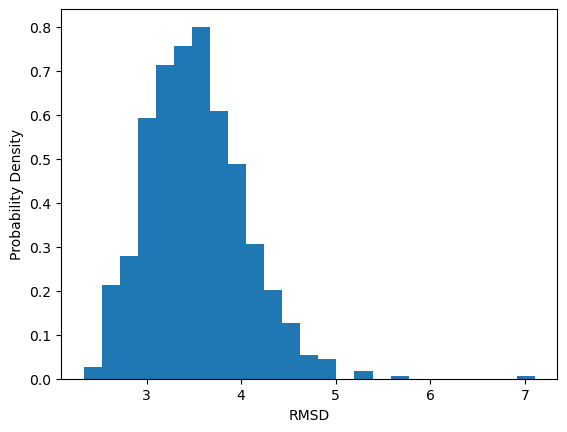

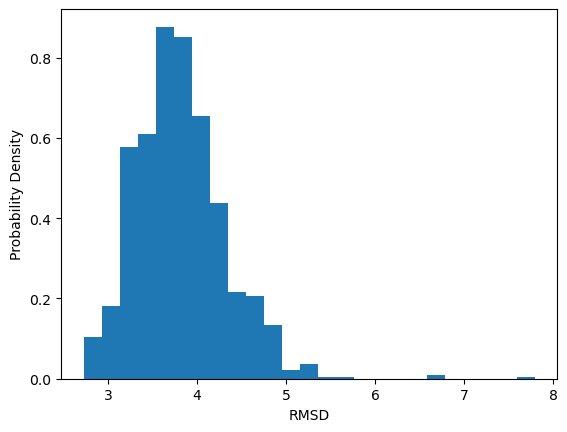

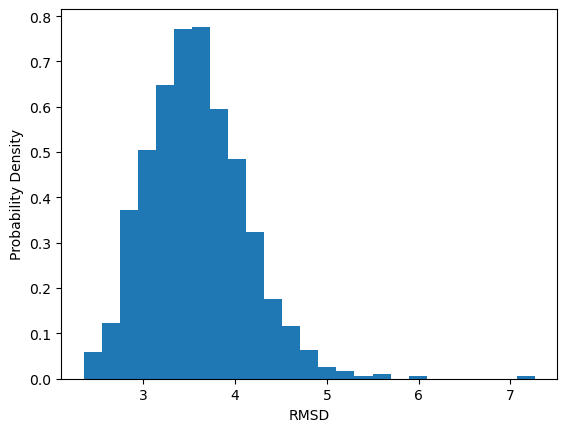

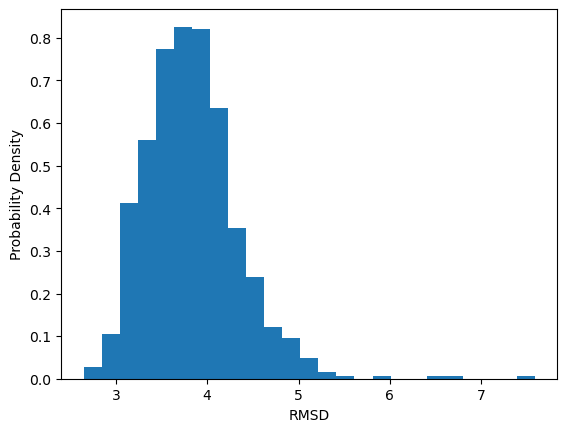

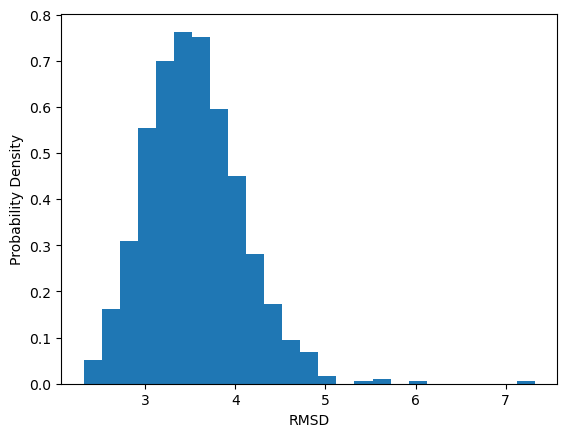

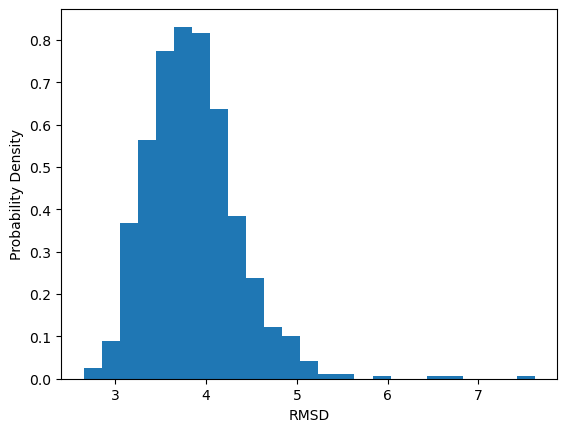

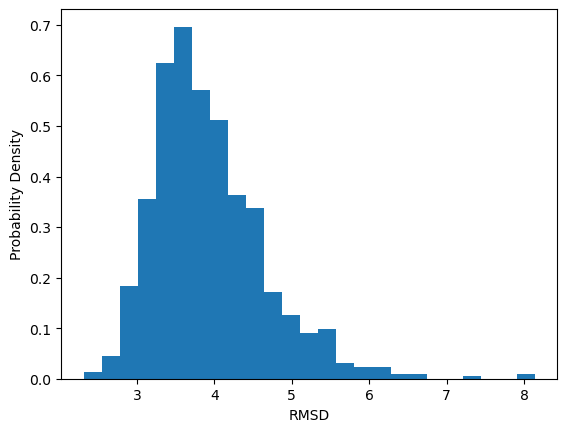

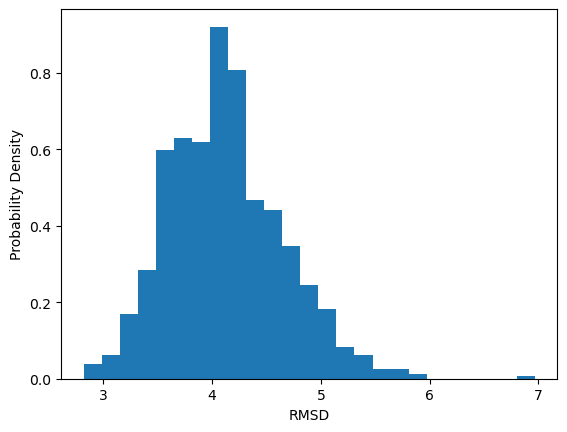

In [14]:
for i in range(10,20):
    basic_rmsd_hist(rmsds[i,:],bins=25)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='RMSD', ylabel='Probability Density'>)

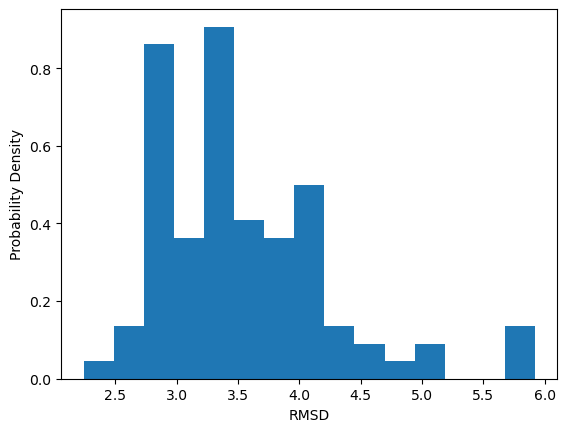

In [15]:
basic_rmsd_hist(rmsds[:,2],bins=15)

In [16]:
np.where(rmsds==rmsds.max())

(array([55]), array([274]))

In [17]:
np.where(rmsds.min(0)==rmsds.min(0).max())

(array([274]),)

In [18]:
rmsds[:,618]

array([4.1238866, 5.3866243, 4.3562098, 5.429709 , 4.314177 , 5.371792 ,
       5.667563 , 4.9434686, 5.6781864, 4.9369864, 5.700902 , 5.061194 ,
       3.466502 , 4.1288476, 3.5889945, 4.1209445, 3.6477687, 4.11382  ,
       5.2520947, 3.6354966, 5.3001738, 3.7183437, 5.255082 , 3.7523236,
       5.59455  , 4.964249 , 5.544801 , 4.820516 , 5.767764 , 4.4656796,
       5.5443516, 5.3160114, 5.5349174, 5.2726054, 5.247929 , 5.2786193,
       5.0249543, 4.095639 , 5.2825723, 4.2345104, 4.9995146, 4.019303 ,
       4.3646946, 5.5562544, 4.2463303, 5.7372727, 4.25405  , 5.7696614,
       4.3333807, 4.832657 , 4.725091 , 4.9867415, 4.695109 , 4.905252 ,
       5.20766  , 5.9070773, 4.992792 , 5.586356 , 5.206306 , 5.9826427,
       4.0059485, 4.9242377, 4.1915045, 5.0827317, 3.8804677, 5.0862913,
       3.7747667, 4.3132834, 3.8721893, 4.869121 , 3.713408 , 4.356928 ,
       3.6009858, 3.903242 , 3.9038093, 4.1312337, 3.588175 , 3.9141138,
       4.9195895, 4.763516 , 5.24369  , 4.712332 , 

In [23]:
a=np.argmin(np.random.rand(5,5,5),axis=0)

In [27]:
for frame in t_ref:
    b = frame.clone()
    break

AttributeError: 'Trajectory' object has no attribute 'clone'

In [1]:
import sys
sys.path.insert(0,'../data_utils/')
from diffusion_dists_to_dcd import convert_directory,pt_to_dcd

In [2]:
#convert_directory('../../data/samples/origami_64_no_embed_reduction/')
pt_to_dcd('../../data/samples/origami_64_no_embed_reduction/sample_200_0.5_0.0_36_1.pt')

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [3]:
from NewSample import load_dist_maps

In [4]:
map = load_dist_maps('../../data/samples/origami_64_no_embed_reduction/sample_200_0.5_0.0_36_1.pt')

In [6]:
map.shape

torch.Size([2000, 1, 64, 64])

In [7]:
import torch
i,j = torch.triu_indices(64,64,1)

In [8]:
map[...,i,j].min()

tensor(-8.8818e-16, dtype=torch.float64)

(array([1.3840e+03, 9.0750e+03, 1.3859e+04, 2.3474e+04, 5.2666e+04,
        1.5786e+04, 3.4250e+03, 2.4090e+03, 1.8470e+03, 1.0930e+03,
        5.4300e+02, 2.2900e+02, 1.0200e+02, 5.6000e+01, 1.4000e+01,
        1.0000e+01, 3.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.        , 0.28723596, 0.57447191, 0.86170787, 1.14894383,
        1.43617979, 1.72341574, 2.0106517 , 2.29788766, 2.58512361,
        2.87235957, 3.15959553, 3.44683149, 3.73406744, 4.0213034 ,
        4.30853936, 4.59577531, 4.88301127, 5.17024723, 5.45748319,
        5.74471914, 6.0319551 , 6.31919106, 6.60642701, 6.89366297,
        7.18089893]),
 <BarContainer object of 25 artists>)

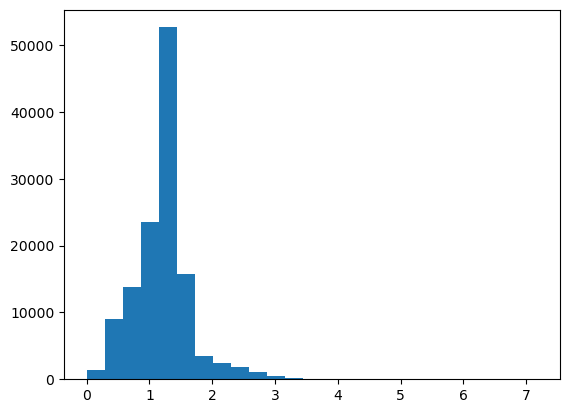

In [13]:
import matplotlib.pyplot as plt
ii = map[...,range(63),range(1,64)]
ii = ii[ii.isfinite()]
plt.hist(ii.flatten().cpu().numpy(),bins=25)